Here we can introduce using the binomial by calculating probability for a range of values.  Finally can then use to show how can be used with the significance test.  This can be very similalr to what is shown in resource

When you are using a binomial distribuion, think coin flips. For example, suppose we've got a coin, and we want to find out if it's true, that is, if, when we flip the coin, are we as likely to see heads as we are to see tails. A null hypothesis for this situation could be



A null hypothesis for this situation could be

> **Ho:** We're just as likely to get heads as tails when we flip the coin.

A suitable alternative hypothesis might be:

> **Ha:** We're more likely to see either heads or tails when we flip the coin.

This is a two-sided experiment, since we'll reject the null hypothesis if heads are more likely or if tails are more likely. We could use a one-sided alternative hypothesis like "We're more likely to see tails than heads". 

## Experimental Setting

Now we need to perform an experiment in order to help test our hypothesis. We can say that in order to test the null hypothesis that heads are just as likely as tails, we are going to toss the coin 100 times and record the results. 

For tossing a fair coin (which is what the null hypothesis states), most statisticians agree that the number of heads (or tails) that we would expect follows what is called a binomial distribution. This distribution takes two parameters: 

>$n$- the number of individual independent experiments (think number of coin flips)

>$p$- the probability of success of that event (think .5 for a fair coin)



Let's model 100 fair coin flips and observe the number of heads. Since it's fair, we set p=.5. 

The histogram below simulates this 100-flip event. use `np.random.random(n)` to return random number in the interval [0.0, 1.0] and count the output where a number is less than 0.5. We shall treat this number as the total count for heads for n=100 flips. Plot the frequency of heads and tails. 

Let's first import the necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import proportion
sns.set_style('ticks')

45 55


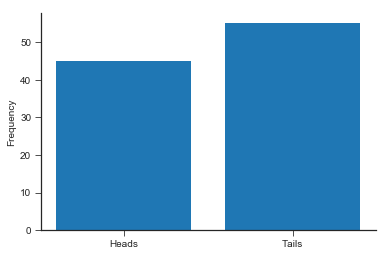

In [84]:
np.random.seed(17)
heads = (np.random.random(n) < p).sum()

fig, ax = plt.subplots()
ax.bar([0, 1], [heads, n-heads])
ax.set_xticks((0,1))
ax.set_xticklabels(('Heads', 'Tails'))
ax.set_ylabel('Frequency')
sns.despine()

print (heads, (100-heads))

Carrying out this random experiment, we see 45 heads and 55 tails. Can we safely say that the coin is fair? Without some further guidelines, it would be very hard to say if this deviation from 50/50 really provides much evidence one way or the other. To proceed any further, we have to have some notion of what we'd expect to see in the long run if the null hypothesis was true. 

Let's run the above experiment for 10,000 times and plot a histogram for frequency of heads.

using `np.random.binomial(n,p, size)`, we can also define an extra parameter for defining number of trials for our experiment.

>$size$- the number of times you want to run this experiment (let's set that to 10,000 - experiment with this value and see the effet)


Under the null hypothesis, the probability is .5. In Python, we can see the expected probability of getting any particular number of heads if we tossed a coin 100 times by plotting the density function for the binomial distribution with parameters 100 and .5 .

Let's model 100 fair coin flips. Since it's fair, $p=.5$. The histogram below simulates this 100-flip event happening 10000 times.

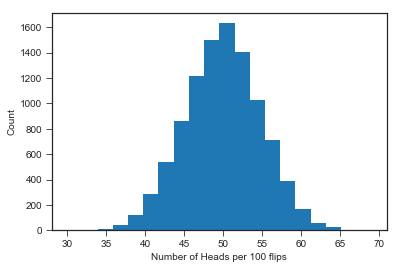

In [85]:
np.random.seed(16)

p = 0.5
n = 100
size = 10000

plt.hist(np.random.binomial(n,p, size), bins=20)
plt.xlabel('Number of Heads per 100 flips')
plt.ylabel('Count')
plt.show()

As you'd probably expect, the most common value we'd see would be 50, but there are lots of reasonable values that aren't exactly 50 that would also occur pretty often. So to make a decision rule for when we will reject the null hypothesis, we would first decide how often we're willing to reject the null hypothesis when it was actually true. 
Without any compelling reason to choose otherwise, people usually will accept an error of 5% when performing a hypothesis test.

With a two-sided hypothesis like this one, to come up with a decision rule that would be wrong only 5% of the time, we'd need to find the number of heads for which we'd see fewer heads 2.5% of the time, and the number of heads for which we'd see more heads 2.5% of the time.

We shall use `statsmodels.stats.proportion.binom_test_reject_interval(value, nobs, alpha=0.05, alternative='two-sided')` for calculating the rejection region. 

**Parameters:**	

>value (float) – proportion under the Null hypothesis

>nobs (integer) – the number of trials or observations.

In [88]:
min_heads, max_heads = proportion.binom_test_reject_interval(0.5, n, alpha=0.05, alternative='two-sided')
min_heads, max_heads, heads

(39.0, 61.0, 45)

So in this experiment, if the number of heads we saw was between 39 and 61 (out of 100 tosses), we would accept the null hypothesis; formally stating that there's not enough evidence to reject the null hypothesis. 

If we saw fewer than 39 or more than 61 tosses, we would say we had enough evidence to reject the null hypothesis, knowing that we would be wrong only 5% of the time. When we reject the null hypothesis when it was actually true, it's said to be a Type I error. So in this example, we're setting the Type I error rate to 5%.

## Plotting the Acceptance and Rejection Regions

Using the assumptions you made and the alpha level you decided on, construct the rejection region for the test, that is, the values of the statistic for which you'll be willing to reject the null hypothesis. In this example, the rejection region is broken up into two sections: less than 39 heads and more than 61 heads. Let's to plot the our findings for presentation. 

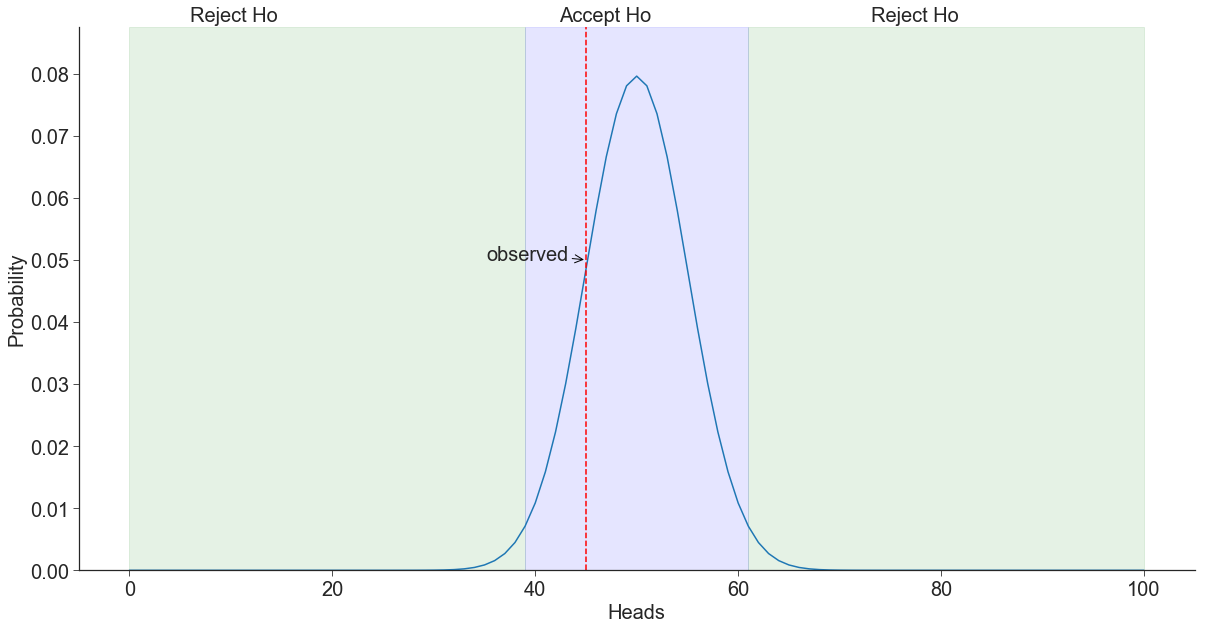

In [109]:
# Use stats.binom to generate a binomial random variable with 
rv = stats.binom(n, 0.5)

#  discrete.pmf(k)
#  Probability mass function at k of the given RV.
max_freq = rv.pmf(n/2)
fig, ax = plt.subplots(figsize=(20, 10))
plt.rc('font', size=20)   

#  Fill the lower region area for rejecting null hypothesis
ax.fill_between([0, min_heads], [max_freq*1.1]*2, alpha=0.1, color='g')

# Fill the area rejection area for accepting null hypothesis
ax.fill_between([min_heads, max_heads], [max_freq*1.1]*2, alpha=0.1, color = 'b')

#  Fill the upper region area for rejecting null hypothesis
ax.fill_between([max_heads, 100], [max_freq*1.1]*2, alpha=0.1, color='g')


# plot the pmf for hundred flips
ax.plot(rv.pmf(np.arange(0, n+1)))

# Plot the observed number of heads
ax.axvline(heads, color='r', ls='--')
ax.annotate('observed', 
            (heads, 0.05), xytext=(-100, 0), 
            xycoords='data', textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

# Fill the Rejection and Acceptance regions for null hypothesis            
ax.annotate('Reject Ho', (0.1, 1.01), xycoords='axes fraction')
ax.annotate('Accept Ho', (0.43, 1.01), xycoords='axes fraction')
ax.annotate('Reject Ho', ((max_heads/100)+0.1, 1.01), xycoords='axes fraction')

# Define y-limit and label the axes
ax.set(
    ylim=(0, max_freq*1.1),
    xlabel='Heads',
    ylabel='Probability'
)
sns.despine()